In [120]:
'''
Load the model
'''
import importlib
import demo
importlib.reload(demo)

imageRotationDemo = demo.ImageRotationDemo(
    model_dir='../experiments/run005/', crop_strategy="option2")


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Loaded model from directory ../experiments/run005/


In [121]:
'''
Load images and correct rotation
'''
import os
n_samples = 1000
image_dir_path = '../data/rotated_birds/'  # Path to rotated images
output_dir = '../output/'  # Path to predicted images

# Load paths to images
image_names = [
    '2ce6dce8f3ec4a3c8256d6c4f0957f04.jpg',
    '2eaf954beb32486d807fd6bc200f48bf.jpg',
    '0eeb864c4b444dcba1a1e92c649b33c8.jpg',
    '1fa27a6d466a4001a5e5345ed40b118b.jpg',
    '2fa2e6a817434f489811faf03fd4b548.jpg',
    '1b28e4a633de4e5892dbcfb98ecf08ba.jpg',
    '96e949d390194eac84c2e7b5cf08fd95.jpg',
    '0e4520dbdf394e15b53002c978969cca.jpg',
    '2fcddd56d2f74cc8895eefd018855c5c.jpg',
    '1bd5100ca1734fa799825ae93d60046d.jpg'
]
source_images = [os.path.join(image_dir_path, img_name)
                 for img_name in image_names]

# Predict image rotation
predictions = imageRotationDemo.fix_rotation(
    source_images, output_dir, v=False)


In [122]:
'''
Load DB of ground truth image rotations
'''
import math
import sqlite3

con = sqlite3.connect('../data/birds.db')
cur = con.cursor()
sql = "SELECT filename, radians_rotated FROM birds_split WHERE filename IN ({seq})".format(
    seq=','.join(['?']*len(image_names)))
res = cur.execute(sql, image_names)

ground_truth_angles = res.fetchall()
ground_truth_angles = {file_name: radians for file_name,
                       radians in ground_truth_angles if radians > math.radians(45)}


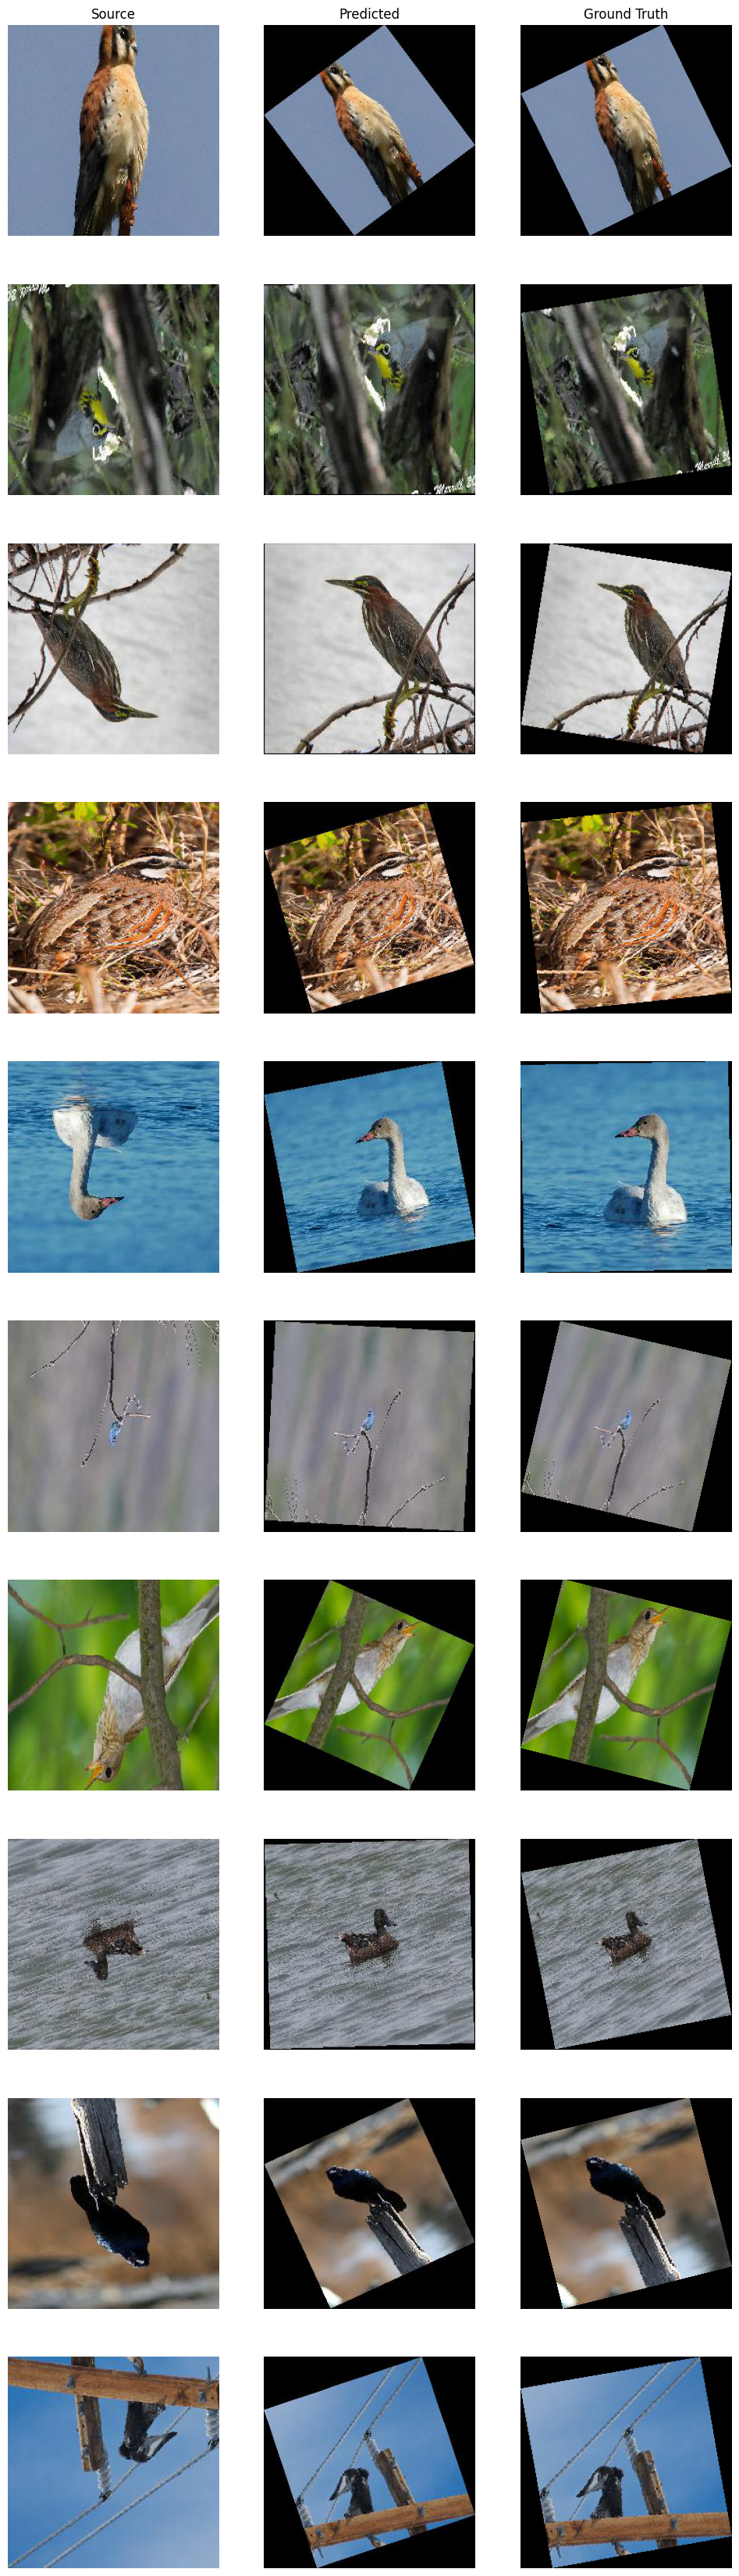

In [123]:
'''
Display images
'''

from PIL import Image
import matplotlib.pyplot as plt

num_images = len(image_names)
fig_width = 10
fig_height = fig_width / 3 * num_images
f, axarr = plt.subplots(num_images, 3, figsize=(fig_width, fig_height))
plt.tight_layout()
axarr[0, 0].set_title('Source')
axarr[0, 1].set_title('Predicted')
axarr[0, 2].set_title('Ground Truth')
for i in range(num_images):
    img_name = image_names[i]
    rotated_image = Image.open(os.path.join(image_dir_path, img_name))
    predicted_path = os.path.join(output_dir, img_name)
    predicted_image = Image.open(predicted_path)
    ground_truth_image = rotated_image.rotate(
        math.degrees(-ground_truth_angles[img_name]), expand=True)
    axarr[i, 0].imshow(rotated_image)
    axarr[i, 1].imshow(predicted_image)
    axarr[i, 2].imshow(ground_truth_image)
    axarr[i, 0].axis('off')
    axarr[i, 1].axis('off')
    axarr[i, 2].axis('off')
plt.show()
